1.請利用村里界圖與人口數繪製台北市士林區、內湖區以及北投區的地理資訊與人口顏色表示圖。

In [ ]:
from google.colab import drive    #將雲端硬碟與這台機器掛載在一起
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/pandas_GIS/notebook

/content/drive/MyDrive/pandas_GIS/notebook


In [ ]:
!pip install geopandas
!pip install mapclassify
!pip install pysal==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
villages_shp = gpd.read_file('../geodata/台灣里界圖_TWD97/Village_NLSC_121_1050219.shp')

In [ ]:
villages_shp.head()   #裡面有7726筆

,OBJECTID,UID,PRO_ID,COUNTY_ID,TOWN_ID,VILLAGE_ID,V_Name,T_Name,C_Name,Substitute,geometry
0,8573,7064,64,64,6401000,6401000-013,中興里,旗津區,高雄市,中興里,"POLYGON ((177607.758 2497521.111, 177630.724 2..."
1,8578,3626,10,10007,1000712,1000712-006,頂潭里,田中鎮,彰化縣,頂潭里,"POLYGON ((207765.541 2641446.581, 207796.390 2..."
2,8579,3627,10,10007,1000712,1000712-007,中潭里,田中鎮,彰化縣,中潭里,"POLYGON ((207195.132 2641217.485, 207196.409 2..."
3,8580,3628,10,10007,1000712,1000712-008,龍潭里,田中鎮,彰化縣,龍潭里,"POLYGON ((206697.079 2641761.284, 206702.181 2..."
4,8581,3642,10,10007,1000712,1000712-022,大社里,田中鎮,彰化縣,大社里,"POLYGON ((206697.079 2641761.284, 206692.842 2..."


In [ ]:
villages_shp[villages_shp['C_Name'] == '台北市']       #發現找不到台北市

,OBJECTID,UID,PRO_ID,COUNTY_ID,TOWN_ID,VILLAGE_ID,V_Name,T_Name,C_Name,Substitute,geometry


In [ ]:
villages_shp[villages_shp['C_Name'] == '臺北市']      #回去看資料夾裡的答案是否有台北市的資料，發現有，但"台北"是改用"臺北"表示

,OBJECTID,UID,PRO_ID,COUNTY_ID,TOWN_ID,VILLAGE_ID,V_Name,T_Name,C_Name,Substitute,geometry
329,786,6300,63,63,6300300,6300300-037,群英里,大安區,臺北市,群英里,"POLYGON ((305194.502 2769018.033, 305193.348 2..."
330,787,6301,63,63,6300300,6300300-038,虎嘯里,大安區,臺北市,虎嘯里,"POLYGON ((305377.458 2768610.906, 305453.775 2..."
331,788,6302,63,63,6300300,6300300-039,臥龍里,大安區,臺北市,臥龍里,"POLYGON ((305174.523 2768624.042, 305174.904 2..."
332,789,6303,63,63,6300300,6300300-040,龍淵里,大安區,臺北市,龍淵里,"POLYGON ((304762.720 2768653.278, 304771.907 2..."
333,790,6304,63,63,6300300,6300300-041,龍門里,大安區,臺北市,龍門里,"POLYGON ((303941.602 2769601.906, 303942.242 2..."
...,...,...,...,...,...,...,...,...,...,...,...
2600,5142,6644,63,63,6301200,6301200-039,泉源里,北投區,臺北市,泉源里,"POLYGON ((303674.550 2783841.168, 303675.176 2..."
2601,5143,6645,63,63,6301200,6301200-040,湖山里,北投區,臺北市,湖山里,"POLYGON ((305825.331 2783202.295, 305787.198 2..."
2602,5144,6646,63,63,6301200,6301200-041,大屯里,北投區,臺北市,大屯里,"POLYGON ((302321.083 2784659.166, 302323.105 2..."
2603,5145,6647,63,63,6301200,6301200-042,湖田里,北投區,臺北市,湖田里,"POLYGON ((306356.549 2789178.260, 306396.119 2..."


In [ ]:
import pandas as pd

In [ ]:
census_villages = pd.read_csv('../geodata/112年3月台北人口數.csv',encoding = 'big5')     #從網路上找到最新的台北市資料

In [ ]:
census_villages

,地區,合計
0,松山區,191599
1,信義區,204983
2,大安區,287706
3,中山區,214040
4,中正區,149134
5,大同區,119366
6,萬華區,173265
7,文山區,258757
8,南港區,113831
9,內湖區,274538


In [ ]:
#為了跟界里圖有相同欄位
census_villages['city'] = '臺北市'       #在資料後方新增一個CITY欄位，為了配合界里圖的欄位，改用"臺北"稱呼

In [ ]:
census_villages

,地區,合計,city
0,松山區,191599,臺北市
1,信義區,204983,臺北市
2,大安區,287706,臺北市
3,中山區,214040,臺北市
4,中正區,149134,臺北市
5,大同區,119366,臺北市
6,萬華區,173265,臺北市
7,文山區,258757,臺北市
8,南港區,113831,臺北市
9,內湖區,274538,臺北市


In [ ]:
census_villages.columns    

Index(['地區', '合計', 'city'], dtype='object')

In [ ]:
#整合界里圖資料，選擇作業指定的區
demo_villages = ['士林區', '內湖區', '北投區']     #指定的區
Taipei_villages_shp = villages_shp[villages_shp['C_Name']=='臺北市']   #從界里圖中選出所有的台北市

Taipei_villages_shp = Taipei_villages_shp[['C_Name', 'T_Name', 'V_Name', 'geometry']]   #保留幾個有用的欄位即可

demo_villages_shp = Taipei_villages_shp[
    Taipei_villages_shp['T_Name'].apply(                 #指定的區當作條件，去抓出符合的
        lambda t: True if t in demo_villages else False
    )
]

In [ ]:
demo_villages_shp

,C_Name,T_Name,V_Name,geometry
1133,臺北市,士林區,蘭雅里,"POLYGON ((303361.326 2777841.561, 303354.533 2..."
1134,臺北市,士林區,蘭興里,"POLYGON ((303108.613 2778393.346, 303091.158 2..."
1135,臺北市,士林區,天福里,"POLYGON ((303920.529 2778968.567, 303920.176 2..."
1136,臺北市,士林區,天祿里,"POLYGON ((303633.450 2778453.771, 303596.229 2..."
1137,臺北市,士林區,天壽里,"POLYGON ((303289.880 2778999.905, 303296.693 2..."
...,...,...,...,...
2599,臺北市,北投區,關渡里,"POLYGON ((297283.510 2779492.176, 297350.182 2..."
2600,臺北市,北投區,泉源里,"POLYGON ((303674.550 2783841.168, 303675.176 2..."
2601,臺北市,北投區,湖山里,"POLYGON ((305825.331 2783202.295, 305787.198 2..."
2602,臺北市,北投區,大屯里,"POLYGON ((302321.083 2784659.166, 302323.105 2..."


In [ ]:
demo_census_villages = census_villages[census_villages["地區"].isin(demo_villages)]  #isin() 會傳回布林值去比較，留下與指定的市區相符的

In [ ]:
demo_census_villages.head()

,地區,合計,city
9,內湖區,274538,臺北市
10,士林區,265938,臺北市
11,北投區,241656,臺北市


In [ ]:
demo_census_villages = demo_census_villages[['city', '地區','合計']]    #調整欄位順序

In [ ]:
demo_census_villages

,city,地區,合計
9,臺北市,內湖區,274538
10,臺北市,士林區,265938
11,臺北市,北投區,241656


In [ ]:
demo_villages_shp

,C_Name,T_Name,V_Name,geometry
1133,臺北市,士林區,蘭雅里,"POLYGON ((303361.326 2777841.561, 303354.533 2..."
1134,臺北市,士林區,蘭興里,"POLYGON ((303108.613 2778393.346, 303091.158 2..."
1135,臺北市,士林區,天福里,"POLYGON ((303920.529 2778968.567, 303920.176 2..."
1136,臺北市,士林區,天祿里,"POLYGON ((303633.450 2778453.771, 303596.229 2..."
1137,臺北市,士林區,天壽里,"POLYGON ((303289.880 2778999.905, 303296.693 2..."
...,...,...,...,...
2599,臺北市,北投區,關渡里,"POLYGON ((297283.510 2779492.176, 297350.182 2..."
2600,臺北市,北投區,泉源里,"POLYGON ((303674.550 2783841.168, 303675.176 2..."
2601,臺北市,北投區,湖山里,"POLYGON ((305825.331 2783202.295, 305787.198 2..."
2602,臺北市,北投區,大屯里,"POLYGON ((302321.083 2784659.166, 302323.105 2..."


將兩筆資料合併

In [ ]:
demo_villages_shp_group = demo_villages_shp.groupby(by=['C_Name', 'T_Name'], as_index=False)    #利用groupby來合併資料區分
demo_villages_shp_group

In [ ]:


list(demo_villages_shp_group)  #先轉成list來看內容。    groupby的過程就是將原有的DataFrame按照groupby(by=城市、區)去區分成多個分組的DataFrame

[(('臺北市', '內湖區'),
       C_Name T_Name V_Name                                           geometry
  2498    臺北市    內湖區    西湖里  POLYGON ((307561.255 2775474.558, 307525.631 2...
  2499    臺北市    內湖區    西康里  POLYGON ((306693.853 2776736.056, 306641.492 2...
  2500    臺北市    內湖區    西安里  POLYGON ((307673.902 2776263.218, 307655.393 2...
  2501    臺北市    內湖區    港墘里  POLYGON ((307818.003 2774847.701, 307855.068 2...
  2502    臺北市    內湖區    港都里  POLYGON ((308329.110 2775007.174, 308329.198 2...
  2503    臺北市    內湖區    港富里  POLYGON ((308537.985 2775744.648, 308541.054 2...
  2504    臺北市    內湖區    港華里  POLYGON ((308317.258 2775851.829, 308320.378 2...
  2505    臺北市    內湖區    內湖里  POLYGON ((310033.532 2775234.500, 310027.335 2...
  2506    臺北市    內湖區    湖濱里  POLYGON ((309378.028 2775372.794, 309396.050 2...
  2507    臺北市    內湖區    紫星里  POLYGON ((309945.726 2774730.760, 309943.638 2...
  2508    臺北市    內湖區    大湖里  POLYGON ((311715.549 2775983.715, 311713.785 2...
  2509    臺北市    內湖區    金龍里  POLYG

Shapely 库是一个非常强大的几何处理工具，可以应用于各种领域的几何计算和分析。
主要用于处理 2D 和 3D 几何对象，例如点、线、多边形、圆等等，提供了一系列的几何操作和方法，比如计算几何对象的面积、长度、交集、缓冲区等等。

Shapely主要应用领域包括地理信息系统（GIS）、地理空间数据分析、建筑设计、交通规划等等

In [ ]:
import shapely   

當我們有一個 pandas DataFrame 或者 Series 物件，其中每一欄都包含一個幾何物件，這些幾何物件可能是點、線、面等等。我們想要將每一欄的幾何物件合併成一個單獨的幾何物件，以便我們可以更方便地對其進行處理和分析。

為了實現這個目標，我們可以使用 agg() 方法，將一個函數作為參數傳入。在這個例子中，我們傳入的函數是一個匿名函數 
lambda t: shapely.ops.unary_union(t)，它使用了一個名為 Shapely 的 Python 庫中的 unary_union() 函數，將每一欄中的所有幾何物件合併成一個單獨的幾何物件。

在 Shapely 庫中，ops 是 operation（操作）的縮寫，指的是可以對幾何物件執行的各種操作或功能。ops 模組中包含了許多常見的空間分析操作，例如緩衝、交叉點計算、距離計算、簇合等等。這些操作可以讓我們更方便地進行空間數據的處理和分析。

最終，這個聚合操作會產生一個新的 DataFrame 或者 Series 物件，其中每一欄都包含一個合併後的幾何物件，這樣我們就可以更輕鬆地對其進行操作和分析。

In [ ]:
#我們只想看區，所以將相同區的里都合併在一起
demo_district_shp = gpd.GeoDataFrame(
    demo_villages_shp_group['geometry'].agg(lambda t: shapely.ops.unary_union(t)))   #agg()是聚合函數，可以傳回一個函數。
                    #這些資料已經用區 區分完成了                     #將各個區分完成後各別裡面的每一列的geometry合併，最後視為一個一元的座標單位給予t
                                                                  #再利用聚合函數去回傳回去

In [ ]:
demo_district_shp         #將各區裡面又細分的里的座標合併成一個範圍

,C_Name,T_Name,geometry
0,臺北市,內湖區,"POLYGON ((308399.157 2771742.908, 308325.888 2..."
1,臺北市,北投區,"POLYGON ((301618.962 2776722.795, 301500.654 2..."
2,臺北市,士林區,"POLYGON ((302902.663 2774721.478, 302917.001 2..."


<Axes: >

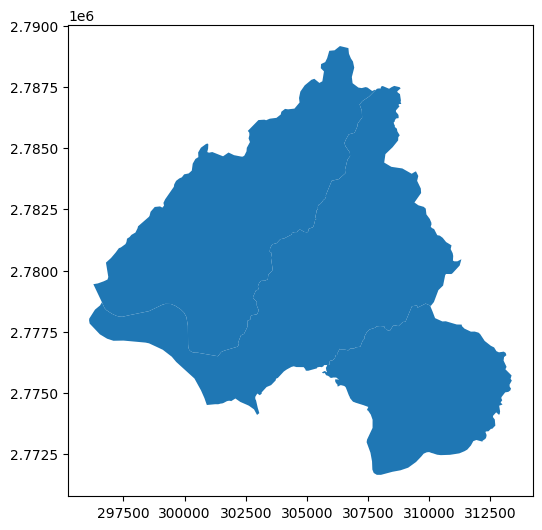

In [ ]:
demo_district_shp.plot(figsize=(6,8))   #劃出三個市區涵蓋的範圍

In [ ]:
#合併三個區的人口數 
demo_census_villages_group = demo_census_villages.groupby(by=['city', '地區'], as_index=False)   #將相同區的做groupby()
demo_census_villages_groupㄝ

In [ ]:
list(demo_census_villages_group)

[(('臺北市', '內湖區'),
    city   地區      合計
  9  臺北市  內湖區  274538),
 (('臺北市', '北投區'),
     city   地區      合計
  11  臺北市  北投區  241656),
 (('臺北市', '士林區'),
     city   地區      合計
  10  臺北市  士林區  265938)]

In [ ]:
demo_census_district = demo_census_villages_group['合計'].sum()

In [ ]:
demo_census_district

,city,地區,合計
0,臺北市,內湖區,274538
1,臺北市,北投區,241656
2,臺北市,士林區,265938


In [ ]:
demo_district_shp   

,C_Name,T_Name,geometry
0,臺北市,內湖區,"POLYGON ((308399.157 2771742.908, 308325.888 2..."
1,臺北市,北投區,"POLYGON ((301618.962 2776722.795, 301500.654 2..."
2,臺北市,士林區,"POLYGON ((302902.663 2774721.478, 302917.001 2..."


In [ ]:
demo_census_district_shp = demo_district_shp.merge(
    demo_census_district,left_on=('C_Name', 'T_Name'),right_on=('city', '地區'))    #C_NAME對照city、T_NAME對照地區做merge()

In [ ]:
demo_census_district_shp

,C_Name,T_Name,geometry,city,地區,合計
0,臺北市,內湖區,"POLYGON ((308399.157 2771742.908, 308325.888 2...",臺北市,內湖區,274538
1,臺北市,北投區,"POLYGON ((301618.962 2776722.795, 301500.654 2...",臺北市,北投區,241656
2,臺北市,士林區,"POLYGON ((302902.663 2774721.478, 302917.001 2...",臺北市,士林區,265938


In [ ]:
demo_census_district_shp = gpd.GeoDataFrame(demo_census_district_shp)

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

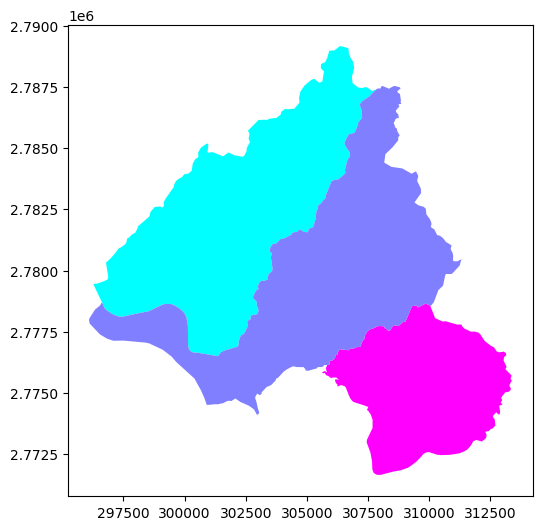

In [ ]:
demo_census_district_shp.plot(column='合計', scheme='QUANTILES', k=3, cmap='cool',figsize=(6,8))  #利用人口數區分畫圖